In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("C:/AI/PAMAP_features.csv", index_col=0)
df

,sub_id,activity_id,act_level,hr_mean,hr_mean_normal,hr_std,hr_std_normal,hand_tmp_mean,hand_tmp_std,hand_acc_x_mean,...,ankle_acc_xz_cor,hand_gyr_xy_cor,hand_gyr_yz_cor,hand_gyr_xz_cor,chest_gyr_xy_cor,chest_gyr_yz_cor,chest_gyr_xz_cor,ankle_gyr_xy_cor,ankle_gyr_yz_cor,ankle_gyr_xz_cor
3006,2,17,light,87.000000,1.175676,0.000000,7.105427e-15,34.375000,0.000000,-1.165524,...,0.233251,-0.472662,0.335516,-0.377507,-0.290138,-0.779952,0.071855,-0.305959,-0.003001,-0.638866
3497,2,4,moderate,124.605469,1.683858,0.927920,1.253946e-02,31.875000,0.000000,-12.040995,...,-0.119772,-0.287380,-0.230390,-0.491314,0.011124,-0.799319,-0.135736,-0.653133,-0.654575,0.391363
14495,7,5,vigorous,113.493430,1.891557,2.315888,3.859813e-02,32.500000,0.000000,-3.723040,...,0.025673,-0.265566,0.824691,-0.121345,-0.004923,-0.317761,-0.202148,-0.660278,-0.528138,0.402147
13278,7,17,light,82.513672,1.375228,0.492657,8.210948e-03,33.812500,0.000000,-3.618932,...,0.724061,-0.196728,0.315984,-0.380337,0.284190,-0.109078,-0.071734,-0.177813,0.237828,-0.729771
14969,8,3,light,73.000000,1.106061,0.000000,7.327472e-15,34.437500,0.000000,-9.275877,...,-0.001651,-0.060776,0.165672,0.311760,-0.272620,-0.014943,-0.191610,-0.261158,0.066954,0.057685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10708,6,2,light,82.582031,1.376367,0.930285,1.550475e-02,33.525635,0.030741,-4.306831,...,0.193950,-0.354026,0.175876,-0.172933,0.184131,-0.274344,-0.485489,-0.100010,-0.000800,0.031654
4870,3,2,light,76.998047,1.132324,0.806906,1.186626e-02,32.083130,0.029390,-1.545991,...,0.135629,0.056979,0.008235,0.001093,-0.203294,-0.097797,-0.273316,-0.009717,-0.076216,0.009411
11822,6,4,moderate,93.445312,1.557422,0.493415,8.223580e-03,31.750000,0.000000,-10.034760,...,-0.404942,0.520845,-0.951838,-0.561901,-0.169119,0.299434,-0.100683,-0.555866,-0.442849,0.063207
3866,2,7,moderate,129.160156,1.745408,0.361877,4.890232e-03,30.465576,0.031088,-8.275569,...,-0.136336,-0.147614,-0.344375,-0.329746,-0.024487,-0.536806,-0.161019,-0.752563,-0.627185,0.436639


In [2]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
label=LabelEncoder()

df['sub_id']=label.fit_transform(df['sub_id'])
df['activity_id']=label.fit_transform(df['activity_id'])
df['act_level']=label.fit_transform(df['act_level'])
df.head()

,sub_id,activity_id,act_level,hr_mean,hr_mean_normal,hr_std,hr_std_normal,hand_tmp_mean,hand_tmp_std,hand_acc_x_mean,...,ankle_acc_xz_cor,hand_gyr_xy_cor,hand_gyr_yz_cor,hand_gyr_xz_cor,chest_gyr_xy_cor,chest_gyr_yz_cor,chest_gyr_xz_cor,ankle_gyr_xy_cor,ankle_gyr_yz_cor,ankle_gyr_xz_cor
3006,1,10,0,87.000000,1.175676,0.000000,7.105427e-15,34.3750,0.0,-1.165524,...,0.233251,-0.472662,0.335516,-0.377507,-0.290138,-0.779952,0.071855,-0.305959,-0.003001,-0.638866
3497,1,3,1,124.605469,1.683858,0.927920,1.253946e-02,31.8750,0.0,-12.040995,...,-0.119772,-0.287380,-0.230390,-0.491314,0.011124,-0.799319,-0.135736,-0.653133,-0.654575,0.391363
14495,6,4,2,113.493430,1.891557,2.315888,3.859813e-02,32.5000,0.0,-3.723040,...,0.025673,-0.265566,0.824691,-0.121345,-0.004923,-0.317761,-0.202148,-0.660278,-0.528138,0.402147
13278,6,10,0,82.513672,1.375228,0.492657,8.210948e-03,33.8125,0.0,-3.618932,...,0.724061,-0.196728,0.315984,-0.380337,0.284190,-0.109078,-0.071734,-0.177813,0.237828,-0.729771
14969,7,2,0,73.000000,1.106061,0.000000,7.327472e-15,34.4375,0.0,-9.275877,...,-0.001651,-0.060776,0.165672,0.311760,-0.272620,-0.014943,-0.191610,-0.261158,0.066954,0.057685


In [3]:
# 결측치 확인
df.isnull().sum()

sub_id              0
activity_id         0
act_level           0
hr_mean             0
hr_mean_normal      0
                   ..
chest_gyr_yz_cor    0
chest_gyr_xz_cor    0
ankle_gyr_xy_cor    0
ankle_gyr_yz_cor    0
ankle_gyr_xz_cor    0
Length: 67, dtype: int64

In [4]:
import seaborn as sns

import matplotlib.pyplot as plt

import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

Text(0.5, 1.0, 'Label')

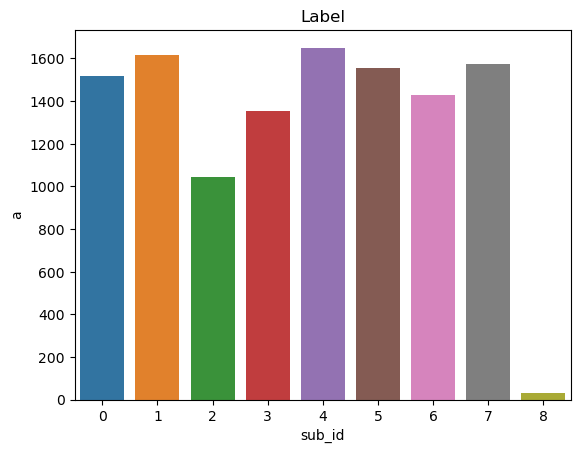

In [5]:
# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="sub_id")
plt.ylabel("a")
plt.title("Label")

In [6]:
# 레이블 갯수 확인 (숫자)
df['sub_id'].value_counts()

sub_id
4    1651
1    1618
7    1576
5    1556
0    1518
6    1430
3    1353
2    1042
8      29
Name: count, dtype: int64

Text(0.5, 1.0, 'Subject')

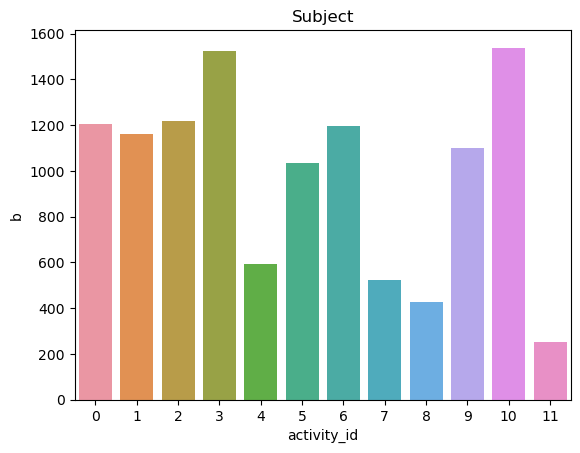

In [7]:
# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="activity_id")
plt.ylabel("b")
plt.title("Subject")

In [8]:
# 레이블 갯수 확인 (숫자)
df['activity_id'].value_counts()

activity_id
10    1539
3     1525
2     1220
0     1203
6     1196
1     1162
9     1099
5     1035
4      593
7      522
8      428
11     251
Name: count, dtype: int64

In [9]:
X=df.drop(['sub_id', 'act_level'],axis=1)
X.head()

,activity_id,hr_mean,hr_mean_normal,hr_std,hr_std_normal,hand_tmp_mean,hand_tmp_std,hand_acc_x_mean,hand_acc_x_std,hand_acc_y_mean,...,ankle_acc_xz_cor,hand_gyr_xy_cor,hand_gyr_yz_cor,hand_gyr_xz_cor,chest_gyr_xy_cor,chest_gyr_yz_cor,chest_gyr_xz_cor,ankle_gyr_xy_cor,ankle_gyr_yz_cor,ankle_gyr_xz_cor
3006,10,87.000000,1.175676,0.000000,7.105427e-15,34.3750,0.0,-1.165524,2.383779,3.381285,...,0.233251,-0.472662,0.335516,-0.377507,-0.290138,-0.779952,0.071855,-0.305959,-0.003001,-0.638866
3497,3,124.605469,1.683858,0.927920,1.253946e-02,31.8750,0.0,-12.040995,3.734766,3.069947,...,-0.119772,-0.287380,-0.230390,-0.491314,0.011124,-0.799319,-0.135736,-0.653133,-0.654575,0.391363
14495,4,113.493430,1.891557,2.315888,3.859813e-02,32.5000,0.0,-3.723040,10.188184,11.705779,...,0.025673,-0.265566,0.824691,-0.121345,-0.004923,-0.317761,-0.202148,-0.660278,-0.528138,0.402147
13278,10,82.513672,1.375228,0.492657,8.210948e-03,33.8125,0.0,-3.618932,1.935690,0.542981,...,0.724061,-0.196728,0.315984,-0.380337,0.284190,-0.109078,-0.071734,-0.177813,0.237828,-0.729771
14969,2,73.000000,1.106061,0.000000,7.327472e-15,34.4375,0.0,-9.275877,0.082824,1.006239,...,-0.001651,-0.060776,0.165672,0.311760,-0.272620,-0.014943,-0.191610,-0.261158,0.066954,0.057685


In [10]:
y=df['sub_id']
y.value_counts()

sub_id
4    1651
1    1618
7    1576
5    1556
0    1518
6    1430
3    1353
2    1042
8      29
Name: count, dtype: int64

In [11]:
Y = pd.get_dummies(y).values

Y

array([[False,  True, False, ..., False, False, False],
       [False,  True, False, ..., False, False, False],
       [False, False, False, ...,  True, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False,  True, False, ..., False, False, False],
       [False,  True, False, ..., False, False, False]])

In [12]:
X = X.values

X

array([[ 1.00000000e+01,  8.70000000e+01,  1.17567568e+00, ...,
        -3.05958745e-01, -3.00077749e-03, -6.38866238e-01],
       [ 3.00000000e+00,  1.24605469e+02,  1.68385769e+00, ...,
        -6.53133351e-01, -6.54575222e-01,  3.91363415e-01],
       [ 4.00000000e+00,  1.13493430e+02,  1.89155717e+00, ...,
        -6.60278246e-01, -5.28137910e-01,  4.02146741e-01],
       ...,
       [ 3.00000000e+00,  9.34453125e+01,  1.55742187e+00, ...,
        -5.55865799e-01, -4.42848703e-01,  6.32073012e-02],
       [ 6.00000000e+00,  1.29160156e+02,  1.74540752e+00, ...,
        -7.52563011e-01, -6.27184592e-01,  4.36639097e-01],
       [ 8.00000000e+00,  1.42234375e+02,  1.92208615e+00, ...,
        -1.64102644e-02, -6.62742491e-01, -8.59535039e-02]])

In [13]:

from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(9418, 65) (2355, 65) (9418, 9) (2355, 9)


In [14]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam

In [15]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(65,)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(9, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 65)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │           8,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 9)                   │             585 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,289 (67.54 KB)

 Trainable params: 17,289 (67.54 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model_history=model.fit(x=X_train, y=y_train, epochs=30, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/30
295/295 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3584 - loss: 2.3877 - val_accuracy: 0.7766 - val_loss: 0.8712
Epoch 2/30
295/295 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7804 - loss: 0.7842 - val_accuracy: 0.8136 - val_loss: 0.5998
Epoch 3/30
295/295 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8270 - loss: 0.5404 - val_accuracy: 0.8887 - val_loss: 0.4033
Epoch 4/30
295/295 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9023 - loss: 0.3540 - val_accuracy: 0.9329 - val_loss: 0.2659
Epoch 5/30
295/295 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9198 - loss: 0.2661 - val_accuracy: 0.9567 - val_loss: 0.1898
Epoch 6/30
295/295 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9393 - loss: 0.2076 - val_accuracy: 0.9563 - val_loss: 0.1705
Epoch 7/30
295/295 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9563 - loss: 0.1611 - val_accuracy: 0.9639 - val_loss: 0.1366
Epoch 8/30
295/295 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9518 - loss: 0.1576 - val_accuracy: 0.

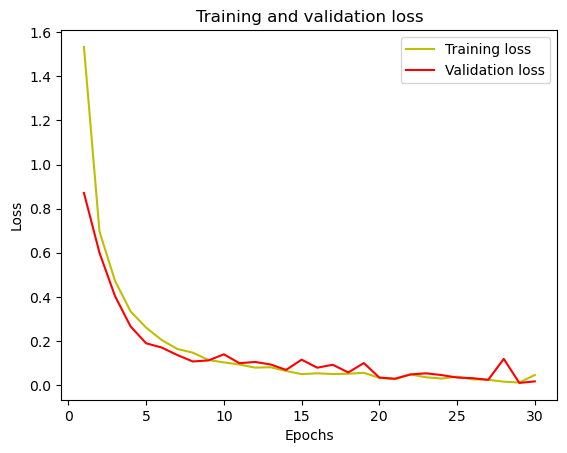

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [18]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       304
           1       1.00      1.00      1.00       337
           2       1.00      1.00      1.00       205
           3       0.99      1.00      0.99       274
           4       1.00      1.00      1.00       339
           5       1.00      1.00      1.00       300
           6       1.00      1.00      1.00       288
           7       1.00      1.00      1.00       303
           8       1.00      1.00      1.00         5

    accuracy                           1.00      2355
   macro avg       1.00      1.00      1.00      2355
weighted avg       1.00      1.00      1.00      2355

[[303   0   0   1   0   0   0   0   0]
 [  0 336   1   0   0   0   0   0   0]
 [  0   0 204   1   0   0   0   0   0]
 [  0   0   0 274   0   0   0   0   0]
 [  0   0   0   0 338   0   1   0   0]
 [  0   0   0   1   0 299   0   0   0]
 [  0   1   0   0   0   0 287   0   0]
 [  0   0   0   0   0 